In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Imported the CSVs
df_2022 = pd.read_csv("data/wild_horses/Wild_horses_2022.csv")
df_2023 = pd.read_csv("data/wild_horses/Wild_horses_2023.csv")
df_2024 = pd.read_csv("data/wild_horses/Wild_horses_2024.csv")

In [4]:
#Inspected the head
df_2022.head()

,State,HA BLM Acres,HA Total Acres,HA Transferred Acres,HMA BLM Acres,HMA Total Acres,Horses,Burros,Total,High AML,Year
0,AZ,"2,019,027","3,643,197",0,"1,498,207","2,296,269",404,"9,092","9,496","1,676",2022
1,CA,"5,170,931","7,021,651","1,425,649","2,053,082","2,533,722","6,724","3,416","10,140","2,200",2022
2,CO,"723,095","851,275",0,"365,988","404,013","1,873",0,"1,873",827,2022
3,ID,"420,783","477,300",0,"383,894","418,268",555,0,555,617,2022
4,MT,"103,844","230,073",0,"27,094","35,640",195,0,195,120,2022


In [11]:
#Inspected the head
df_2023.head()

,State,HA BLM Acres,HA Total Acres,HA Transferred Acres,HMA BLM Acres,HMA Total Acres,Horses,Burros,Total,High AML,Year
0,AZ,"2,019,027","3,643,197",0,"1,498,207","2,296,269",465,"6,205","6,670","1,676",2023
1,CA,"5,170,931","7,021,651","1,425,649","2,053,082","2,533,722","4,007","3,013","7,020","2,200",2023
2,CO,"723,095","851,275",0,"365,988","404,013","1,527",0,"1,527",827,2023
3,ID,"420,783","477,300",0,"383,894","418,268",651,0,651,617,2023
4,MT,"103,844","230,073",0,"27,094","35,640",205,0,205,120,2023


In [15]:
#Inspected the head
df_2024.head()

,State,HA BLM Acres,HA Total Acres,HA Transferred Acres,HMA BLM Acres,HMA Total Acres,Horses,Burros,Total,High AML,Year
0,AZ,"2,019,027","3,643,197",0,"1,498,207","2,296,269",229,"5,898","6,127","1,676",2024
1,CA,"5,170,931","7,021,651","1,425,649","2,053,082","2,533,722","3,487","3,696","7,183","2,200",2024
2,CO,"723,095","851,275",0,"365,988","404,013","1,322",0,"1,322",827,2024
3,ID,"420,783","477,300",0,"383,894","418,268",489,0,489,617,2024
4,MT,"103,844","230,073",0,"27,094","35,640",198,0,198,120,2024


In [ ]:
#Added year columns
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024


In [7]:
# Combined all years
df_all = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_all.head()


,State,HA BLM Acres,HA Total Acres,HA Transferred Acres,HMA BLM Acres,HMA Total Acres,Horses,Burros,Total,High AML,Year
0,AZ,"2,019,027","3,643,197",0,"1,498,207","2,296,269",404,"9,092","9,496","1,676",2022
1,CA,"5,170,931","7,021,651","1,425,649","2,053,082","2,533,722","6,724","3,416","10,140","2,200",2022
2,CO,"723,095","851,275",0,"365,988","404,013","1,873",0,"1,873",827,2022
3,ID,"420,783","477,300",0,"383,894","418,268",555,0,555,617,2022
4,MT,"103,844","230,073",0,"27,094","35,640",195,0,195,120,2022


In [16]:
#Inspected the data types
df_all.dtypes

State                   object
HA BLM Acres            object
HA Total Acres          object
HA Transferred Acres    object
HMA BLM Acres           object
HMA Total Acres         object
Horses                  object
Burros                  object
Total                   object
High AML                object
Year                     int64
dtype: object

In [ ]:
#Converted columns to logical data types (int)
cols_to_numeric = [
    "HA BLM Acres", "HA Total Acres", "HA Transferred Acres",
    "HMA BLM Acres", "HMA Total Acres",
    "Horses", "Burros", "Total", "High AML"
]

#Removed the commas and converted to int
for col in cols_to_numeric:
    df_all[col] = df_all[col].replace(",", "", regex=True).astype(int)

In [ ]:
#Converted Year to string
df_all["Year"] = df_all["Year"].astype(str)



In [25]:
# Verified changes in data types
print(df_all.dtypes)

State                   object
HA BLM Acres             int64
HA Total Acres           int64
HA Transferred Acres     int64
HMA BLM Acres            int64
HMA Total Acres          int64
Horses                   int64
Burros                   int64
Total                    int64
High AML                 int64
Year                    object
dtype: object


In [27]:
# Grouped total population by year
pop_by_year = df_all.groupby("Year")[["Horses", "Burros", "Total"]].sum().reset_index()
pop_by_year.head()

,Year,Horses,Burros,Total
0,2022,129208,35560,164768
1,2023,137856,27910,165766
2,2024,117904,29136,147040


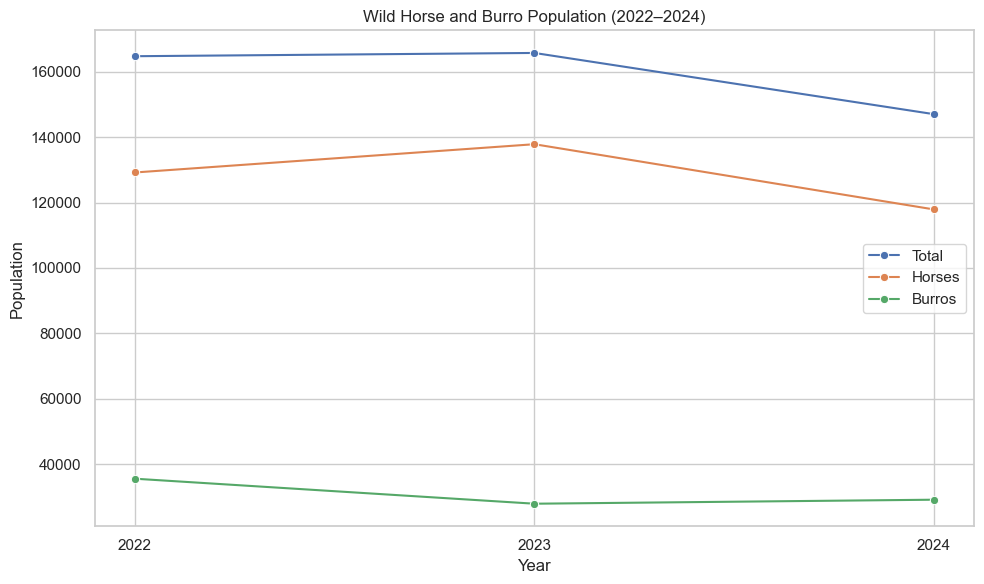

In [35]:
#Plotted total population trend using sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pop_by_year, x="Year", y="Total", marker="o", label="Total")
sns.lineplot(data=pop_by_year, x="Year", y="Horses", marker="o", label="Horses")
sns.lineplot(data=pop_by_year, x="Year", y="Burros", marker="o", label="Burros")

plt.title("Wild Horse and Burro Population (2022–2024)")
plt.ylabel("Population")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()

plt.show()

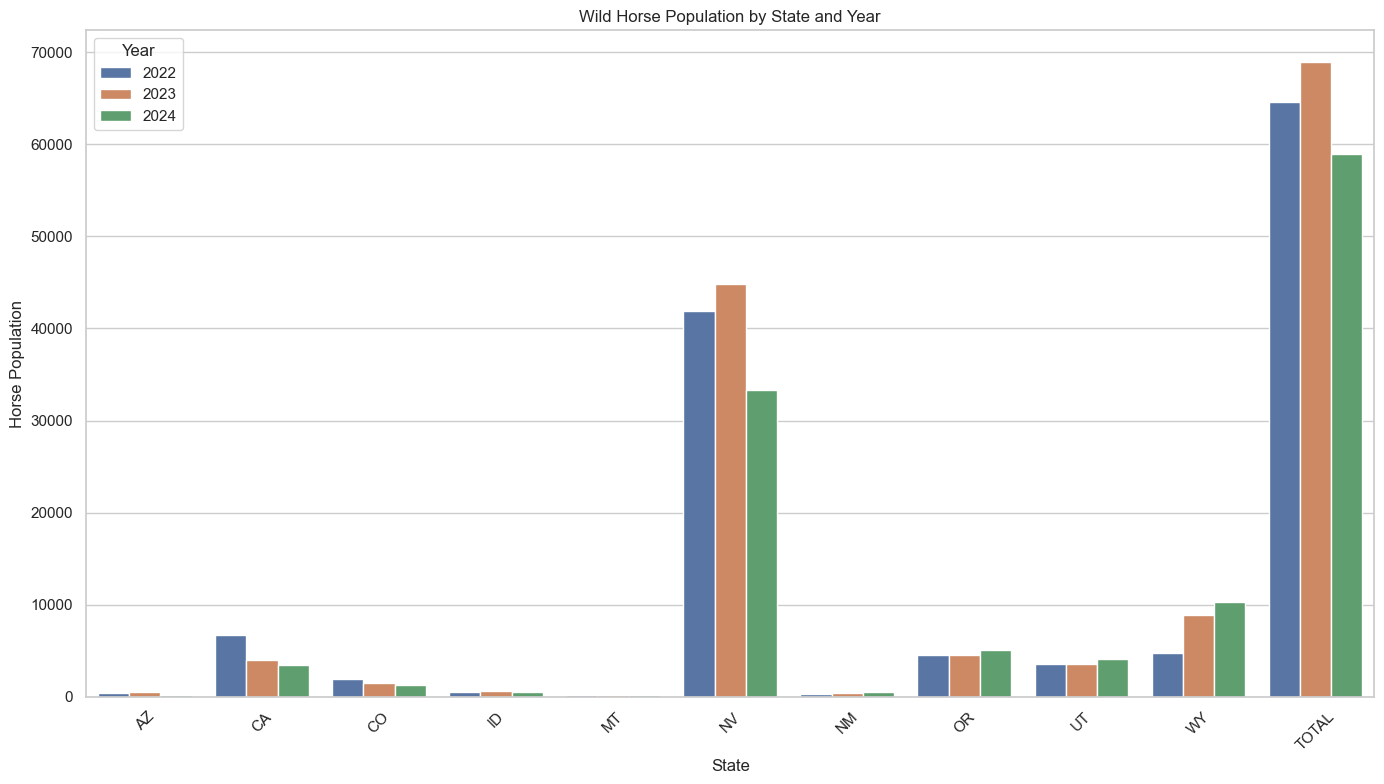

In [36]:
# Plot grouped bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

sns.barplot(data=df_all, x="State", y="Horses", hue="Year")

plt.title("Wild Horse Population by State and Year")
plt.ylabel("Horse Population")
plt.xlabel("State")
plt.legend(title="Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()